In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = 'C:/Users/HP/Desktop/train_test_split/hibiscus/images_hibiscus/images_hibiscus/train'
test_dir = 'C:/Users/HP/Desktop/train_test_split/hibiscus/images_hibiscus/images_hibiscus/test'
validation_dir = 'C:/Users/HP/Desktop/train_test_split/hibiscus/images_hibiscus/images_hibiscus/val'

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255
   
)

# Only rescaling for validation and test data
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # ResNet-50 expects 224x224 images
    batch_size=32,
    class_mode='binary'  # Binary classification
)

validation_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Do not shuffle for evaluation
)



Found 2092 images belonging to 2 classes.
Found 450 images belonging to 2 classes.
Found 450 images belonging to 2 classes.


In [3]:
# Load ResNet-50 without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (optional for fine-tuning)
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [4]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20  
)

C:\Users\HP\Documents\anaconda2\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.4965 - loss: 0.7005 - val_accuracy: 0.5246 - val_loss: 0.6821
Epoch 2/20
 1/65 ━━━━━━━━━━━━━━━━━━━━ 1:41 2s/step - accuracy: 0.5625 - loss: 0.6545

C:\Users\HP\Documents\anaconda2\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


65/65 ━━━━━━━━━━━━━━━━━━━━ 24s 350ms/step - accuracy: 0.5625 - loss: 0.6545 - val_accuracy: 0.5268 - val_loss: 0.6825
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.5773 - loss: 0.6674 - val_accuracy: 0.6473 - val_loss: 0.6504
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 23s 342ms/step - accuracy: 0.6250 - loss: 0.6431 - val_accuracy: 0.6830 - val_loss: 0.6486
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6409 - loss: 0.6493 - val_accuracy: 0.6295 - val_loss: 0.6396
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 23s 339ms/step - accuracy: 0.5312 - loss: 0.6646 - val_accuracy: 0.6652 - val_loss: 0.6386
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.6780 - loss: 0.6322 - val_accuracy: 0.6272 - val_loss: 0.6320
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 41s 618ms/step - accuracy: 0.6562 - loss: 0.6310 - val_accuracy: 0.6719 - val_loss: 0.6280
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.7116 - loss: 0.6128 - val_accuracy: 0.5603 - val_

In [6]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6071 - loss: 0.6175
Test Loss: 0.5843452215194702
Test Accuracy: 0.699999988079071


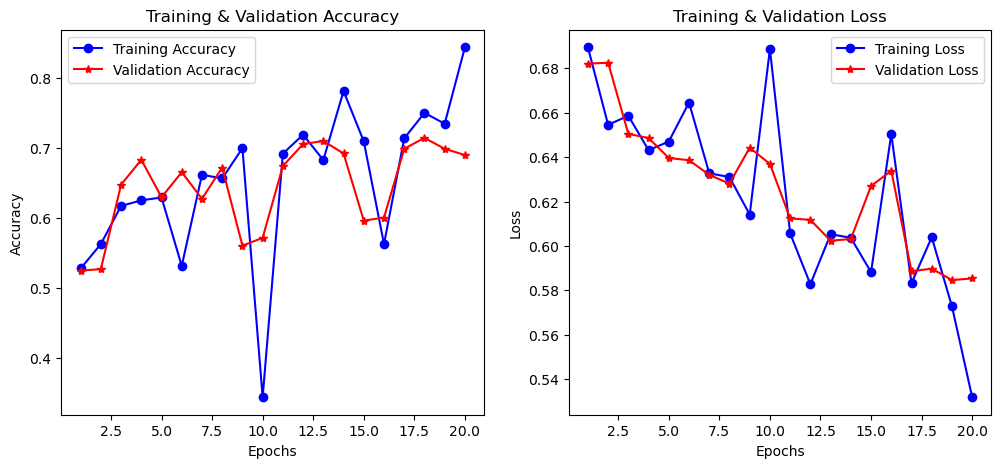

In [7]:
import matplotlib.pyplot as plt

# Plot training history
def plot_history(history):
    # Extract history data
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training & Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training & Validation Loss')

    plt.show()

# Call the function
plot_history(history)
